In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
#Создадим основной сигнал и шум
t = np.arange(0,10,0.001)
main = 4*np.sin(2*np.pi*t+np.pi/2)+0.7*np.cos(2*np.pi*t/2-np.pi/3) - 2*np.exp(2*np.sin(3*np.pi*t))  
noise = np.random.uniform(np.min(main)/3, np.max(main)/3, len(t)) 
noisy_signal = main + noise  


In [63]:
#Создадим массив для фильтра заполненный еденицами
fil = np.ones(100)
# s_convol - массив для свертки, где в центре зашумленный сигнал
s_convol = np.ones(len(main)+2*len(fil)//2-1)
s_convol[len(fil)//2:len(fil)//2+len(main)] = noisy_signal
print(len(s_convol))

10099


In [64]:
s_matrix = []
for i in range(len(main)):
    s_matrix.append(s_convol[i:i+len(fil)])
s_matrix = np.array(s_matrix)
print(s_matrix.shape)

(10000, 100)


In [65]:
#Используем метод наименьших квадратов для нахождения коэффициентов
c = np.linalg.lstsq(s_matrix, main)
print(c[0])

[-0.05729493 -0.05324721 -0.04987098 -0.04523801 -0.0400597  -0.03708154
 -0.03408196 -0.02883465 -0.02618874 -0.02232777 -0.018674   -0.01567465
 -0.0132471  -0.00994369 -0.00797654 -0.00661101 -0.00533662 -0.00331625
 -0.00109112  0.00203373  0.00356753  0.00598488  0.00894535  0.01131404
  0.0138316   0.01680331  0.01964547  0.02264904  0.02323634  0.02402678
  0.02559381  0.02796779  0.02911215  0.03106203  0.03032209  0.03089462
  0.03198204  0.03397752  0.03382152  0.03521619  0.03568218  0.03639086
  0.03758707  0.03799051  0.03749135  0.03915136  0.03881668  0.0393391
  0.03922194  0.03894527  0.0388709   0.03926625  0.03916628  0.03869531
  0.0389545   0.0373381   0.03755561  0.03711929  0.03586726  0.03501149
  0.03431426  0.03280514  0.03275146  0.03092873  0.02972943  0.02941909
  0.03016059  0.02831288  0.02740025  0.02504087  0.02328901  0.02262014
  0.02197737  0.01903043  0.01623413  0.01345672  0.01099342  0.0088451
  0.00576145  0.00351719  0.00189502 -0.00093456 -0.0

C:\Users\ko4nd\AppData\Local\Temp\ipykernel_47232\1971660164.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(s_matrix, main)


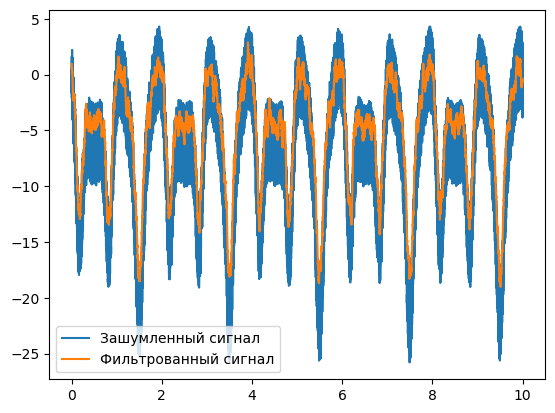

In [72]:
s_filt = s_matrix @ c[0]
plt.plot(t, noisy_signal, label = 'Зашумленный сигнал')
plt.plot(t, s_filt, label = 'Фильтрованный сигнал')
plt.legend()
plt.show()

(array([ 465.,  230.,  220.,  465., 1045., 1000., 3010.,  850., 1130.,
        1585.]),
 array([-1.12559325e+01, -9.84879258e+00, -8.44165266e+00, -7.03451274e+00,
        -5.62737283e+00, -4.22023291e+00, -2.81309299e+00, -1.40595307e+00,
         1.18684274e-03,  1.40832676e+00,  2.81546668e+00]),
 <BarContainer object of 10 artists>)

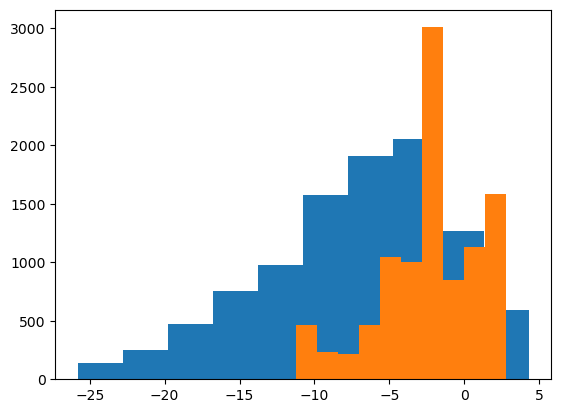

In [67]:
plt.hist(noisy_signal)
plt.hist(clean_signal)

In [68]:
#Используем алгоритм адаптивной фильтрации
learning_rate = 0.0001 
filter_order = 32  
adaptive_filter = np.zeros(filter_order)
for i in range(filter_order, len(noisy_signal)):
    input_vector = noisy_signal[i - filter_order:i][::-1]
    prediction = np.dot(adaptive_filter, input_vector)
    error = noisy_signal[i] - prediction
    adaptive_filter += learning_rate * error * input_vector
filtered_signal = np.convolve(noisy_signal, adaptive_filter, mode='same')

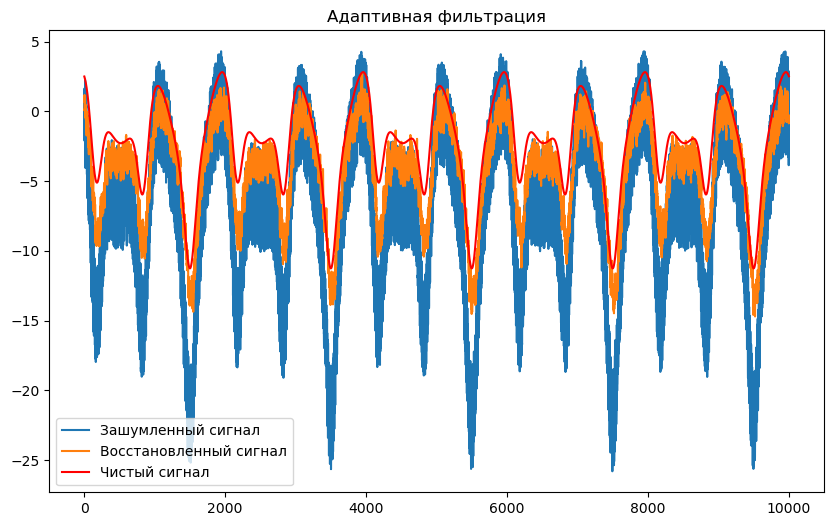

In [69]:
#Выведем графики для наблюдения результатов 
plt.figure(figsize=(10, 6))
plt.plot(noisy_signal, label='Зашумленный сигнал')
plt.plot(filtered_signal, label='Восстановленный сигнал')
plt.plot(clean_signal, label='Чистый сигнал', c='r')
plt.legend()
plt.title('Адаптивная фильтрация')
plt.show()
